# Introduction

This notebook introduces the PRIMAP-hist datasets exploration whose the links are available on our **[github repository](https://github.com/OpenGeoScales/ogs-data-exploration/tree/main/data/ghg-emissions/primap-hist)**. 

These datasets combine several published datasets and are provided by the Potsdam Institute for Climate Impact Research (PIK).

They provide a set of emissions pathways for each country and Kyoto Gas (GHG) from 1850 to 2018.

Here are the differents datasets from the last version (2.2) of February 2021:
- PRIMAP-hist_v2.2_19-Jan-2021.csv contains the numerical extrapolations of all time series to 2018
- PRIMAP-hist_v2.2_no_extrapolation_19-Jan-2021.csv has no numerical extrapolations of missing values and does not include the country groups "EARTH", "ANNEXI", "NONANNEXI", "AOSIS", "BASIC", "EU28", "LDC", "UMBRELLA"

Given that the first dataset contains no missing values thanks to the numerical extrapolations. The exploration below is focused on this dataset.

# Libraries importations and datasets loading

In [1]:
import os

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
folder = "../../../../PRIMAP-hist_v2.2/"
dataset_name = "PRIMAP-hist_v2.2_19-Jan-2021.csv"
primap_hist_data = pd.read_csv(folder+dataset_name)

In [4]:
primap_hist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28622 entries, 0 to 28621
Columns: 174 entries, scenario to 2018
dtypes: float64(169), object(5)
memory usage: 38.0+ MB


In [6]:
primap_hist_data.head()

,scenario,country,category,entity,unit,1850,1851,1852,1853,1854,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,HISTCR,ABW,IPC1A,CH4,Gg,0.000153,0.000158,0.000164,0.000169,0.000174,...,0.03550,0.0385,0.03170,0.05170,0.06840,0.05940,0.05950,0.05390,0.05520,0.0565
1,HISTCR,AFG,IPC1A,CH4,Gg,0.023700,0.023800,0.023900,0.024100,0.024200,...,4.07000,4.4900,5.22000,7.82000,11.70000,5.42000,5.38000,7.59000,7.96000,8.3300
2,HISTCR,AGO,IPC1A,CH4,Gg,1.750000,1.770000,1.800000,1.820000,1.840000,...,57.70000,59.1000,60.50000,61.70000,63.00000,64.30000,65.60000,66.90000,68.30000,69.6000
3,HISTCR,AIA,IPC1A,CH4,Gg,0.000010,0.000010,0.000010,0.000010,0.000010,...,0.00205,0.0024,0.00256,0.00256,0.00275,0.00275,0.00276,0.00286,0.00298,0.0031
4,HISTCR,ALB,IPC1A,CH4,Gg,0.060200,0.060600,0.061500,0.063100,0.065200,...,5.14000,5.0400,4.98000,4.87000,4.79000,4.66000,4.89000,5.00000,5.02000,5.0400


# Variables and their description

The variables description that follows can be found **[here](https://zenodo.org/record/4479172#data-format-description-columns)**.

## Scenario

- HISTCR: in this scenario country-reported data (CRF, BUR, UNFCCC) is prioritized over third-party data (CDIAC, FAO, Andrew, EDGAR, BP).
- HISTTP: in this scenario third-party data (CDIAC, FAO, Andrew, EDGAR, BP) is prioritized over country-reported data (CRF, BUR, UNFCCC).

CRF, BUR, UNFCCC, CDIAC, FAO, Andrew, EDGAR and BP represent the data sources of the PIK dataset.

*How are the data prioritized over the others?*

In the article, it says that the highest priority datasets are the country reported data (UNFCCC). But if the data aren't available or don't meet the minimal requirements, then it uses country reported data provided by third-party sources such as reseach institutions or international organizations.
I haven't found how the scenarios are built and how the priorization is made.

*Does the priorization mean that the data are used from one category and not the other?*
*For all the years of a time serie? Or just some of them?*

I don't know. **For the two last questions, some exploration can be made to answer it.**

In [13]:
primap_hist_data.scenario.value_counts()

HISTTP    14311
HISTCR    14311
Name: scenario, dtype: int64

There are the same numbers of emission pathways (or time series) in each scenario.

## Country

207 ISO 3166 three-letter country codes or 8 custom codes for groups

In [14]:
primap_hist_data.country.unique()

array(['ABW', 'AFG', 'AGO', 'AIA', 'ALB', 'AND', 'ANNEXI', 'ANT', 'AOSIS',
       'ARE', 'ARG', 'ARM', 'ATG', 'AUS', 'AUT', 'AZE', 'BASIC', 'BDI',
       'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR',
       'BLZ', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN',
       'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COK', 'COL',
       'COM', 'CPV', 'CRI', 'CUB', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA',
       'DNK', 'DOM', 'DZA', 'EARTH', 'ECU', 'EGY', 'ERI', 'ESP', 'EST',
       'ETH', 'EU28', 'FIN', 'FJI', 'FRA', 'GAB', 'GBR', 'GEO', 'GHA',
       'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GTM', 'GUY', 'HKG',
       'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ',
       'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ',
       'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY',
       'LCA', 'LDC', 'LIE', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC',
       'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEX', 'MHL', 'MKD', 'MLI',
       'ML

See the **[source](https://zenodo.org/record/4479172#data-format-description-columns)** for more details about the additional custom codes for country groups.

In [15]:
len(primap_hist_data.country.unique())

215

## Category

IPCC (Intergovernmental Panel on Climate Change) 2006 categories for emissions. Some aggregate sectors have been added to the hierarchy. These begin with the prefix IPCM instead of IPC.

In [16]:
primap_hist_data.category.unique()

array(['IPC1A', 'IPC1B1', 'IPC1B2', 'IPC1B3', 'IPC1B', 'IPC1', 'IPC2B',
       'IPC2C', 'IPC2D', 'IPC2G', 'IPC2H', 'IPC2', 'IPC3A', 'IPC4',
       'IPC5', 'IPCM0EL', 'IPCMAGELV', 'IPCMAG', 'IPC2A'], dtype=object)

See the **[source](https://zenodo.org/record/4479172#data-format-description-columns)** for more details about the category description.

## Entity

Gas categories using global warming potentials (GWP) from either Second Assessment Report (SAR) or Fourth Assessment Report (AR4).


In [17]:
primap_hist_data.entity.unique()

array(['CH4', 'CO2', 'FGASESAR4', 'FGASES', 'HFCSAR4', 'HFCS',
       'KYOTOGHGAR4', 'KYOTOGHG', 'N2O', 'NF3', 'PFCSAR4', 'PFCS', 'SF6'],
      dtype=object)

See the **[source](https://zenodo.org/record/4479172#data-format-description-columns)** for more details about the gas description.

## Unit

Unit is either Gg or GgCO2eq (CO2-equivalent according to the global warming potential used).

## Remaining columns

Years from 1850-2018 so 169 years covered.

# Missing values

This part has got the aim to identify in the dataset the variables with missing values, count them and their frequencies. Then, some further analyses will be done if missing values are found.

In [3]:
def count_missing_values_per_variable(dataset):
    return pd.DataFrame(dataset.isnull().sum(), columns=['nb_missing_values'])

In [4]:
def count_frequency_missing_values(recap_table, number_total_values):
    return recap_table.assign(freq_missing_value=lambda df:
                                  round(df.nb_missing_values/number_total_values*100, 1))

In [5]:
def keep_missing_values(table):
    return table[table.nb_missing_values > 0]

In [6]:
def create_recap_table_for_no_missing_value():
    return pd.DataFrame({'Results': ['None missing value in the dataset']})

In [7]:
def sort_descending_number_missing_values(recap_table):
    return recap_table.sort_values(by='nb_missing_values', ascending=False)

In [8]:
def identify_variables_with_missing_values(dataset):
    
    recap_table = count_missing_values_per_variable(dataset)
    recap_table = keep_missing_values(recap_table)
    nb_variables_with_missing_values = len(recap_table)

    if nb_variables_with_missing_values > 0:
        recap_table = count_frequency_missing_values(recap_table, len(dataset))
        recap_table = sort_descending_number_missing_values(recap_table)
    else:
        recap_table = create_recap_table_for_no_missing_value()
    
    return recap_table

In [19]:
list_variables_with_missing_values = identify_variables_with_missing_values(primap_hist_data)
list_variables_with_missing_values

,nb_missing_values,freq_missing_value
1850,104,0.4
1956,104,0.4
1949,104,0.4
1950,104,0.4
1951,104,0.4
...,...,...
2006,94,0.3
2007,72,0.3
2008,70,0.2
2009,34,0.1


In [15]:
list_variables_with_missing_values.index.sort_values()

Index(['1850', '1851', '1852', '1853', '1854', '1855', '1856', '1857', '1858',
       '1859',
       ...
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010'],
      dtype='object', length=161)

In [10]:
identify_variables_with_missing_values(primap_hist_data[['scenario', 'country', 'category', 'entity', 'unit']])

,Results
0,None missing value in the dataset


The first variables 'scenario', 'country', 'category', 'entity' and 'unit' all contain no missing values. The missing values only concern the year variables from 1850 to 2010.

In [11]:
def count_missing_values_per_row(dataset):
    return pd.DataFrame(dataset.isnull().sum(axis=1), columns=['nb_missing_values'])

In [12]:
def identify_rows_with_missing_values(dataset):
    
    recap_table = count_missing_values_per_row(dataset)
    recap_table = keep_missing_values(recap_table)
    nb_rows_with_missing_values = len(recap_table)
    
    if nb_rows_with_missing_values > 0:
        recap_table = count_frequency_missing_values(recap_table, len(dataset.columns))
        recap_table = sort_descending_number_missing_values(recap_table)
    else:
        recap_table = create_recap_table_for_no_missing_value()
        
    return recap_table

In [18]:
list_rows_with_missing_values = identify_rows_with_missing_values(primap_hist_data)
list_rows_with_missing_values

,nb_missing_values,freq_missing_value
11297,161,92.5
25637,161,92.5
25608,161,92.5
11326,161,92.5
6497,160,92.0
...,...,...
15474,154,88.5
1286,154,88.5
15448,154,88.5
1137,154,88.5


In [62]:
filter_rows = list_rows_with_missing_values.index
rows_with_missing_values = primap_hist_data.iloc[filter_rows, ]
rows_with_missing_values_small = rows_with_missing_values.iloc[:, :5]

In [63]:
rows_with_missing_values_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 11297 to 1163
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   scenario  104 non-null    object
 1   country   104 non-null    object
 2   category  104 non-null    object
 3   entity    104 non-null    object
 4   unit      104 non-null    object
dtypes: object(5)
memory usage: 4.9+ KB


In [64]:
rows_with_missing_values_small.category.value_counts()

IPC1B1     48
IPC2       22
IPCM0EL    16
IPC1B       6
IPC1B2      6
IPC2C       4
IPC2B       2
Name: category, dtype: int64

The half of rows with missing values concerns the category *Solid fuels*, the two other over-represented categories are *Industrial Processes and Product Use* and *National Total excluding LULUCF*.

In [66]:
rows_with_missing_values_small[rows_with_missing_values.category == 'IPC1B1']

,scenario,country,category,entity,unit
11297,HISTCR,MNE,IPC1B1,N2O,Gg
25637,HISTTP,SRB,IPC1B1,N2O,Gg
25608,HISTTP,MNE,IPC1B1,N2O,Gg
11326,HISTCR,SRB,IPC1B1,N2O,Gg
11272,HISTCR,HUN,IPC1B1,N2O,Gg
25583,HISTTP,HUN,IPC1B1,N2O,Gg
14693,HISTTP,WSM,IPC1B1,CH4,Gg
14674,HISTTP,TLS,IPC1B1,CH4,Gg
245,HISTCR,COK,IPC1B1,CH4,Gg
20539,HISTTP,COK,IPC1B1,KYOTOGHGAR4,GgCO2eq


In [41]:
rows_with_missing_values_small.scenario.value_counts()

HISTCR    52
HISTTP    52
Name: scenario, dtype: int64

In [42]:
rows_with_missing_values_small.country.value_counts()

MLT    20
MAR    16
KAZ     8
WSM     8
COK     6
TLS     6
PLW     6
KIR     6
MRT     4
OMN     4
EST     4
HUN     2
GRC     2
SRB     2
BGR     2
LTU     2
ESP     2
MNE     2
HRV     2
Name: country, dtype: int64

The most number of rows with missing values concerns Malta and Morocco.

In [45]:
rows_with_missing_values_small[rows_with_missing_values_small.country == 'MLT']

,scenario,country,category,entity,unit
6497,HISTCR,MLT,IPC1B2,KYOTOGHGAR4,GgCO2eq
21025,HISTTP,MLT,IPC1B,KYOTOGHGAR4,GgCO2eq
20808,HISTTP,MLT,IPC1B2,KYOTOGHGAR4,GgCO2eq
6714,HISTCR,MLT,IPC1B,KYOTOGHGAR4,GgCO2eq
9011,HISTCR,MLT,IPC1B2,KYOTOGHG,GgCO2eq
15035,HISTTP,MLT,IPC1B,CH4,Gg
23322,HISTTP,MLT,IPC1B2,KYOTOGHG,GgCO2eq
23539,HISTTP,MLT,IPC1B,KYOTOGHG,GgCO2eq
14821,HISTTP,MLT,IPC1B2,CH4,Gg
724,HISTCR,MLT,IPC1B,CH4,Gg


In [43]:
rows_with_missing_values_small.entity.value_counts()

CH4            28
N2O            16
KYOTOGHGAR4    14
KYOTOGHG       14
PFCSAR4         8
PFCS            8
FGASES          4
HFCS            4
FGASESAR4       4
HFCSAR4         4
Name: entity, dtype: int64

In [57]:
rows_with_missing_values_small.pivot_table(values='scenario', index=['country', 'category', 'entity'], 
                                           aggfunc='count')

scenario
country category entity               
BGR     IPC1B1   N2O                 2
COK     IPC1B1   CH4                 2
                 KYOTOGHG            2
                 KYOTOGHGAR4         2
ESP     IPC1B1   N2O                 2
EST     IPC2     CH4                 2
        IPC2C    CH4                 2
GRC     IPC1B1   N2O                 2
HRV     IPC1B1   N2O                 2
HUN     IPC1B1   N2O                 2
KAZ     IPC2     PFCS                2
                 PFCSAR4             2
        IPCM0EL  PFCS                2
                 PFCSAR4             2
KIR     IPC1B1   CH4                 2
                 KYOTOGHG            2
                 KYOTOGHGAR4         2
LTU     IPC1B1   CH4                 2
MAR     IPC2     FGASES              2
                 FGASESAR4           2
                 HFCS                2
                 HFCSAR4             2
        IPCM0EL  FGASES              2
                 FGASESAR4           2
                 HFCS                2
                 HFCSAR4             2
MLT     IPC1B    CH4                 2
                 KYOTOGHG            2
                 KYOTOGHGAR4         2
        IPC1B2   CH4                 2
                 KYOTOGHG            2
                 KYOTOGHGAR4         2
        IPC2     PFCS                2
                 PFCSAR4             2
        IPCM0EL  PFCS                2
                 PFCSAR4             2
MNE     IPC1B1   N2O                 2
MRT     IPC2     CH4                 2
        IPC2C    CH4                 2
OMN     IPC2     CH4                 2
        IPC2B    CH4                 2
PLW     IPC1B1   CH4                 2
                 KYOTOGHG            2
                 KYOTOGHGAR4         2
SRB     IPC1B1   N2O                 2
TLS     IPC1B1   CH4                 2
                 KYOTOGHG            2
                 KYOTOGHGAR4         2
WSM     IPC1B1   CH4                 2
                 KYOTOGHG            2
                 KYOTOGHGAR4         2
                 N2O                 2

The variables are globally well filled from 99.6% to 100% of completeness. But there are rows with a low filling rate included between 7.5% and 11.5%.

These rows are mostly represented by:
- the countries Malta and Morocco
- the categories *Solid fuels*, *Industrial Processes and Product Use* and *National Total excluding LULUCF*
- the gases *Methane*, *Nitrous oxide*, *Kyoto greenhouse gases (SAR)* and *Kyoto greenhouse gases (AR4)*

# Exploration

## Does the unit refer to specific gases?

In [72]:
primap_hist_data.pivot_table(values='scenario', index=['entity', 'unit'], aggfunc='count', margins=True)

,,scenario
entity,unit,
CH4,Gg,4792
CO2,Gg,5070
FGASES,GgCO2eq,552
FGASESAR4,GgCO2eq,552
HFCS,GgCO2eq,496
HFCSAR4,GgCO2eq,496
KYOTOGHG,GgCO2eq,5028
KYOTOGHGAR4,GgCO2eq,5028
N2O,Gg,5428


In [73]:
len(primap_hist_data)

28622

Each gas has its own unit. 

However the following gases :
- $CH_{4}$
- $N_{2}O$
- $NF_{3}$
- $SF_{6}$

have got a $Gg$ unit instead of $GgCO_{2}eq$. 

A conversion using the Global Warming Potential will be necessary to compare the gas emisions between them.

## Global gas emissions analysis

In [75]:
primap_hist_data.head()

,scenario,country,category,entity,unit,1850,1851,1852,1853,1854,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,HISTCR,ABW,IPC1A,CH4,Gg,0.000153,0.000158,0.000164,0.000169,0.000174,...,0.03550,0.0385,0.03170,0.05170,0.06840,0.05940,0.05950,0.05390,0.05520,0.0565
1,HISTCR,AFG,IPC1A,CH4,Gg,0.023700,0.023800,0.023900,0.024100,0.024200,...,4.07000,4.4900,5.22000,7.82000,11.70000,5.42000,5.38000,7.59000,7.96000,8.3300
2,HISTCR,AGO,IPC1A,CH4,Gg,1.750000,1.770000,1.800000,1.820000,1.840000,...,57.70000,59.1000,60.50000,61.70000,63.00000,64.30000,65.60000,66.90000,68.30000,69.6000
3,HISTCR,AIA,IPC1A,CH4,Gg,0.000010,0.000010,0.000010,0.000010,0.000010,...,0.00205,0.0024,0.00256,0.00256,0.00275,0.00275,0.00276,0.00286,0.00298,0.0031
4,HISTCR,ALB,IPC1A,CH4,Gg,0.060200,0.060600,0.061500,0.063100,0.065200,...,5.14000,5.0400,4.98000,4.87000,4.79000,4.66000,4.89000,5.00000,5.02000,5.0400


Global emissions by gas with Gg unit and *HISTCR* scenario.

In [15]:
gas_emission_analysis = primap_hist_data.drop(columns=['country', 'category'])
gas_emission_analysis = gas_emission_analysis[(gas_emission_analysis.scenario == 'HISTCR') & 
                                              (gas_emission_analysis.unit == 'Gg')].drop(columns=['unit', 'scenario'])
gas_emission_analysis = gas_emission_analysis.groupby(by=['entity']).sum()
gas_emission_analysis = gas_emission_analysis.transpose()
gas_emission_analysis

entity,CH4,CO2,N2O,NF3,SF6
1850,2.731354e+05,2.683856e+06,4098.393967,0.000000,0.000000
1851,2.801771e+05,2.779067e+06,4205.750655,0.000000,0.000000
1852,2.873478e+05,2.921112e+06,4309.378546,0.000000,0.000000
1853,2.948295e+05,3.085236e+06,4407.565854,0.000000,0.000000
1854,3.025440e+05,3.592737e+06,4502.947101,0.000000,0.000000
...,...,...,...,...,...
2014,3.467682e+06,4.001277e+08,109919.564441,1.423358,31.493787
2015,3.475002e+06,3.997824e+08,109816.752433,1.226712,24.241467
2016,3.584161e+06,4.002688e+08,111018.244053,1.291998,25.028598
2017,3.631464e+06,4.048079e+08,112238.790895,1.241352,27.170944


In [16]:
index_date = pd.date_range(start='1850', end='2018', freq='YS')
gas_emission_analysis.set_index(index_date, inplace=True)
gas_emission_analysis.index

DatetimeIndex(['1850-01-01', '1851-01-01', '1852-01-01', '1853-01-01',
               '1854-01-01', '1855-01-01', '1856-01-01', '1857-01-01',
               '1858-01-01', '1859-01-01',
               ...
               '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01',
               '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01',
               '2017-01-01', '2018-01-01'],
              dtype='datetime64[ns]', length=169, freq='AS-JAN')

In [17]:
gas_emission_analysis.describe()

entity,CH4,CO2,N2O,NF3,SF6
count,1.690000e+02,1.690000e+02,169.000000,169.000000,169.000000
mean,1.617503e+06,1.156516e+08,39844.744696,0.151057,5.639794
std,1.086993e+06,1.198961e+08,36550.010977,0.409164,8.783290
min,2.731354e+05,2.683856e+06,4098.393967,0.000000,0.000000
25%,6.567646e+05,2.123714e+07,9628.166463,0.000000,0.000000
50%,1.216139e+06,5.442986e+07,17122.421693,0.000000,0.000000
75%,2.908349e+06,2.197863e+08,79894.954583,0.017650,9.252603
max,3.671269e+06,4.127168e+08,112961.113630,1.705667,31.493787


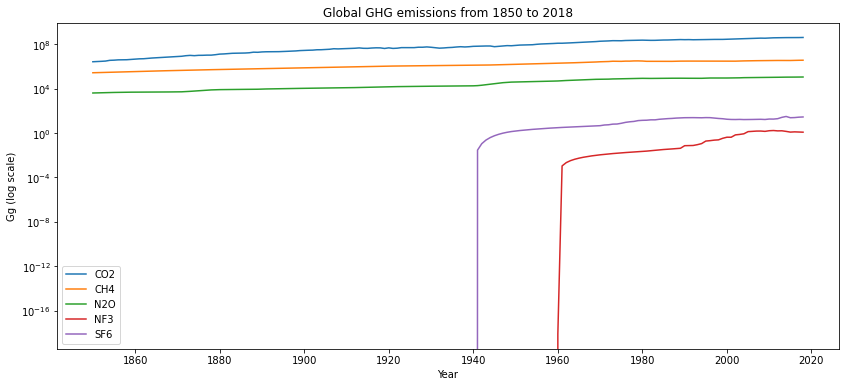

In [27]:
plt.figure(figsize=(14,6))
plt.plot(gas_emission_analysis['CO2'], label='CO2')
plt.plot(gas_emission_analysis['CH4'], label='CH4')
plt.plot(gas_emission_analysis['N2O'], label='N2O')
plt.plot(gas_emission_analysis['NF3'], label='NF3')
plt.plot(gas_emission_analysis['SF6'], label='SF6')
plt.title("Global GHG emissions from 1850 to 2018")
plt.ylabel("Gg (log scale)")
plt.xlabel("Year")
plt.yscale("log")
plt.legend()
plt.show()

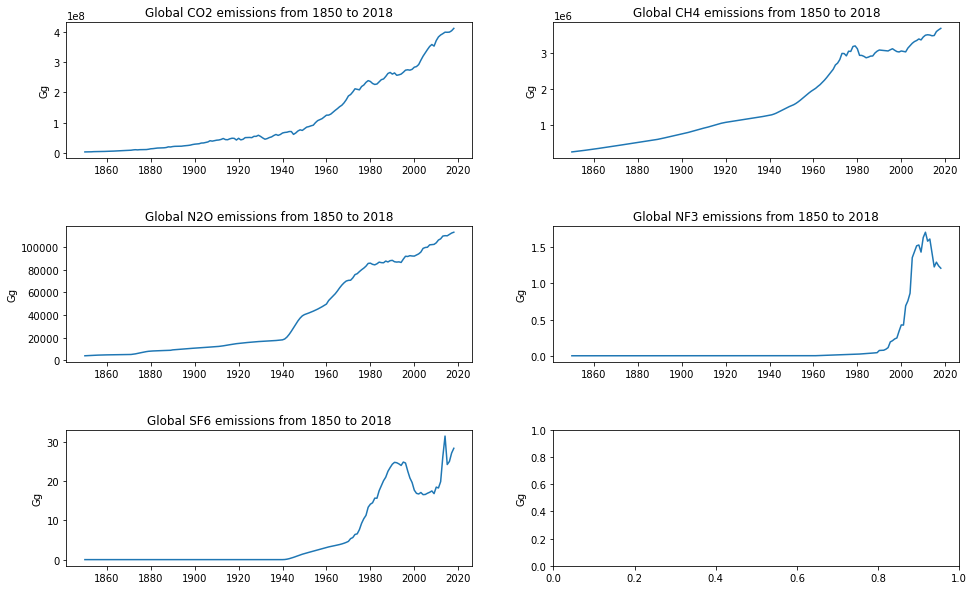

In [42]:
fig, axs = plt.subplots(3, 2, figsize=(16,10))
axs[0, 0].plot(gas_emission_analysis['CO2'])
axs[0, 0].title.set_text("Global CO2 emissions from 1850 to 2018")
axs[0, 1].plot(gas_emission_analysis['CH4'])
axs[0, 1].title.set_text("Global CH4 emissions from 1850 to 2018")
axs[1, 0].plot(gas_emission_analysis['N2O'])
axs[1, 0].title.set_text("Global N2O emissions from 1850 to 2018")
axs[1, 1].plot(gas_emission_analysis['NF3'])
axs[1, 1].title.set_text("Global NF3 emissions from 1850 to 2018")
axs[2, 0].plot(gas_emission_analysis['SF6'])
axs[2, 0].title.set_text("Global SF6 emissions from 1850 to 2018")

for ax in axs.flat:
    ax.set(ylabel='Gg')
    
plt.subplots_adjust(hspace=0.5)

It sounds like there is a problem with the order of magnitude of the $CO_{2}$ emissions. 

For example, in 2018 :
- we've got $4*10^{8}$ $Gg$ of $CO_{2}$
- but the **[IEA data](https://www.iea.org/data-and-statistics/?country=WORLD&fuel=CO2%20emissions&indicator=TotCO2)** show $35$ $Gt$ of $CO_{2}$ so $3.5*10^{7}$ $Gg$


In [45]:
gas_emission_analysis = primap_hist_data.drop(columns=['country', 'category'])
gas_emission_analysis = gas_emission_analysis[(gas_emission_analysis.scenario == 'HISTCR') & 
                                              (gas_emission_analysis.entity == 'KYOTOGHG')].drop(columns=['unit', 'scenario'])
gas_emission_analysis = gas_emission_analysis.groupby(by=['entity']).sum()
gas_emission_analysis = gas_emission_analysis.transpose()
gas_emission_analysis

entity,KYOTOGHG
1850,9.591110e+06
1851,9.854009e+06
1852,1.016243e+07
1853,1.050023e+07
1854,1.118203e+07
...,...
2014,5.004305e+08
2015,5.000246e+08
2016,5.036078e+08
2017,5.091889e+08
